<a href="https://colab.research.google.com/github/JairEsc/Aprendizaje/blob/main/DataKitchet_CIMAT/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo muy sencillo de red neuronal con pytorch

In [1]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=bf238b974b021f34cf33d39a63493bad59b87701cbfd375080029b68295bed23
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

## A Simple Regression Problem
$$y=wx+b+\epsilon $$

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [4]:
# Generates train and validation sets
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

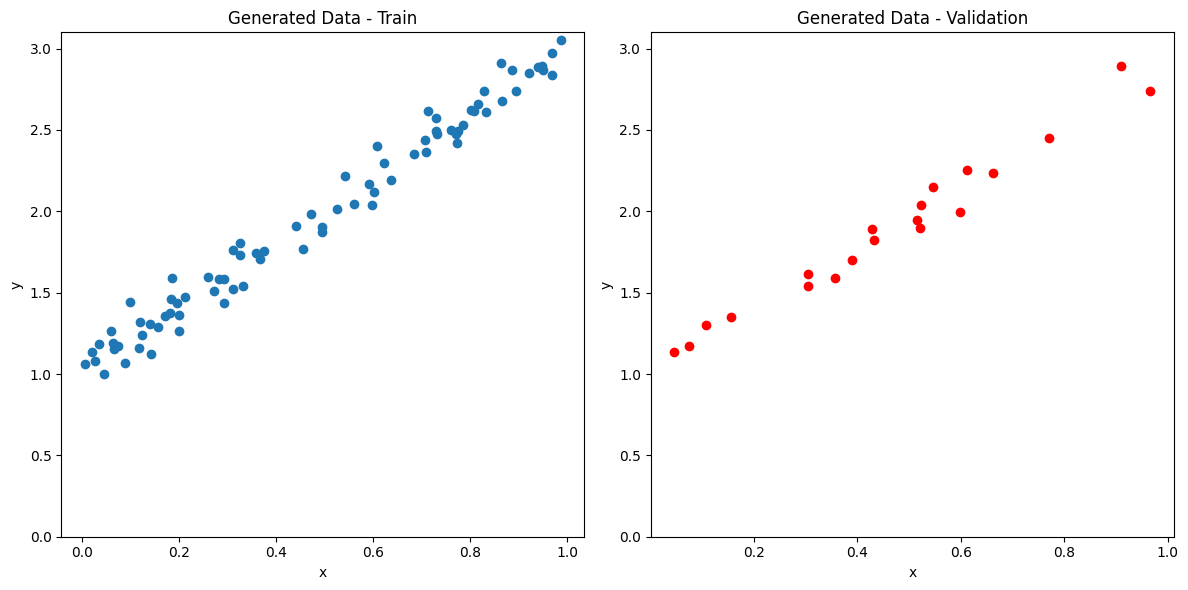

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Generated Data - Train')

ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Generated Data - Validation')
fig.tight_layout()

## Los pasamos a tensores

In [6]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

## Device

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [9]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))
## Esto no debería hacer nada porque estamos usando cpu

Los pasamos TODOS a device

In [11]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [12]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


Cómo deberíamos regresarlos a numpy:

In [13]:
back_to_numpy = x_train_tensor.cpu().numpy()

## Entrenamiento

In [15]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(0)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([1.5410], requires_grad=True) tensor([-0.2934], requires_grad=True)


In [19]:
# DEFINES A SGD OPTIMIZER to update the parameters
optimizer = optim.SGD([b, w], lr=0.1)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and the learning rate. No more manual update!

    optimizer.step()
    optimizer.zero_grad()#Reiniciar gradiente

    if epoch % 100 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

print(b, w)

Epoch 0, Loss 0.008045
Epoch 100, Loss 0.008045
Epoch 200, Loss 0.008045
Epoch 300, Loss 0.008045
Epoch 400, Loss 0.008045
Epoch 500, Loss 0.008045
Epoch 600, Loss 0.008045
Epoch 700, Loss 0.008045
Epoch 800, Loss 0.008045
Epoch 900, Loss 0.008045
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


En el código anterior, definimos manualmente la función de pérdida y consideramos una red muy sencilla (2 neuronas w,b). Podemos hacerlo más general.